In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import matplotlib.ticker as ticker

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2021-05-03 04:15:37--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.07s   

2021-05-03 04:15:38 (306 KB/s) - ‘loan_train.csv’ saved [23101/23101]



## Load Data From CSV File

In [3]:
df = pd.read_csv("loan_train.csv")

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])

In [7]:
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [8]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [9]:
df['Gender'].value_counts()

male      294
female     52
Name: Gender, dtype: int64

In [10]:
import seaborn as sns


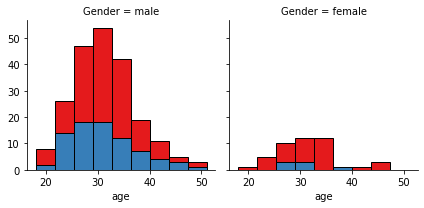

In [11]:
temp = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=temp, ec="k")

## Pre-processing: Feature selection/extraction

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek

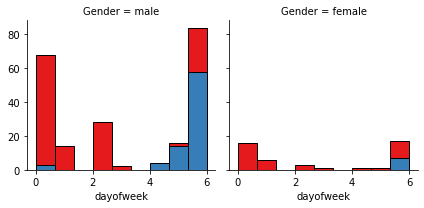

In [13]:
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")

In [14]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4


In [15]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [16]:
##Convert Categorical features to numerical values of age

In [17]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [18]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [19]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [20]:
Feature = df[['Principal','terms','age','Gender','dayofweek', 'weekend']]

In [21]:
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,dayofweek,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,3,0,0,1,0
1,1000,30,33,1,3,0,1,0,0
2,1000,15,27,0,3,0,0,0,1
3,1000,30,28,1,4,1,0,0,1
4,1000,30,29,0,4,1,0,0,1


In [22]:
X = Feature
Y = pd.get_dummies(df['loan_status'])['PAIDOFF'].values

In [23]:
X[0:5]
Y[0:5]

array([1, 1, 1, 1, 1], dtype=uint8)

In [24]:
X[0:5]

,Principal,terms,age,Gender,dayofweek,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,3,0,0,1,0
1,1000,30,33,1,3,0,1,0,0
2,1000,15,27,0,3,0,0,0,1
3,1000,30,28,1,4,1,0,0,1
4,1000,30,29,0,4,1,0,0,1


## Preproccesing

In [25]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -0.26122054,
        -1.20577805, -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -0.26122054,
        -1.20577805,  2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -0.26122054,
        -1.20577805, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.12175534,
         0.82934003, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.12175534,
         0.82934003, -0.38170062, -0.87997669,  1.14984679]])

## Classification

## 1) K Nearest Neighbor(KNN)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [27]:
Ks = 50

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=4)

In [29]:
mean_acc=np.zeros(Ks)
std_acc = np.zeros(Ks)

In [30]:
for n in range(1,Ks):
    knnmodel = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_pred = knnmodel.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,y_pred)
    std_acc[n-1] = np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

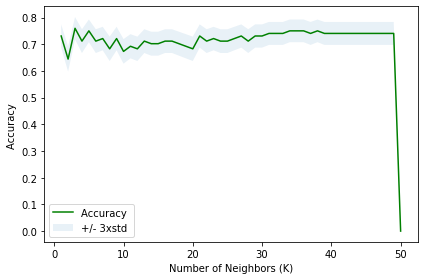

In [31]:
plt.plot(range(1,Ks+1),mean_acc,'g')
plt.fill_between(range(1,Ks+1),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [32]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7596153846153846 with k= 3


## Model Evaluation

In [33]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [34]:
from sklearn.metrics import jaccard_score


In [35]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-05-03 04:15:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-05-03 04:15:45 (40.2 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [36]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [37]:
test_df['effective_date']=pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature_test = test_df[['Principal','terms','age','Gender', 'dayofweek', 'weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test.head()

,Principal,terms,age,Gender,dayofweek,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,3,0,1,0,0
1,300,7,35,0,4,1,0,0,0
2,1000,30,43,1,5,1,0,1,0
3,1000,30,26,0,5,1,0,0,1
4,800,15,29,0,6,1,1,0,0


In [38]:
X_testset=X_testset= preprocessing.StandardScaler().fit(Feature_test).transform(Feature_test)
y_testset=pd.get_dummies(test_df['loan_status'])['PAIDOFF'].values
y_testset

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

## Accuracy Of classification


In [39]:
y_pred_knn=knnmodel.predict(X_testset)

In [40]:
print("F1 Score = ",f1_score(y_testset,y_pred_knn))

F1 Score =  0.851063829787234


In [41]:
print("Jaccard index = ",jaccard_score(y_testset,y_pred_knn))

Jaccard index =  0.7407407407407407


## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dtmodel = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [44]:
y_pred=dtmodel.predict(X_test)
TreeAccuracy=metrics.accuracy_score(y_test,y_pred)

In [45]:
print("Tree accuracy = ",TreeAccuracy)

Tree accuracy =  0.7403846153846154


## Accuracy Of Decision Tree

In [46]:
y_pred_dt=dtmodel.predict(X_testset)


In [47]:
print("F1 Score = ",f1_score(y_testset,y_pred_dt))

F1 Score =  0.8602150537634409


In [48]:
print("Jaccard index = ", jaccard_score(y_testset,y_pred_dt))

Jaccard index =  0.7547169811320755


## Support Vector Machine

In [49]:
from sklearn import svm

In [50]:
svmmodel=svm.SVC(kernel='rbf')
svmmodel.fit(X_train,y_train)

SVC()

In [51]:
y_pred=svmmodel.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [52]:
metrics.accuracy_score(y_test,y_pred)

0.7403846153846154

## Accuracy Of SVM

In [53]:
y_pred_svm=svmmodel.predict(X_testset)

In [54]:
print("F1 Score = ", f1_score(y_testset,y_pred_svm))
print("Jaccard index = ", jaccard_score(y_testset,y_pred_svm))

F1 Score =  0.8387096774193549
Jaccard index =  0.7222222222222222


## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [56]:
lrmodel=LogisticRegression(C=0.05,solver='liblinear').fit(X_train,y_train)

In [57]:
y_pred=lrmodel.predict(X_test)
yhat_prob = lrmodel.predict_proba(X_test)

In [58]:
print(y_pred)
print(yhat_prob)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
[[0.49859416 0.50140584]
 [0.44184243 0.55815757]
 [0.12239452 0.87760548]
 [0.16519069 0.83480931]
 [0.132353   0.867647  ]
 [0.13402104 0.86597896]
 [0.45965066 0.54034934]
 [0.40222274 0.59777726]
 [0.16519069 0.83480931]
 [0.49834436 0.50165564]
 [0.15813844 0.84186156]
 [0.48690832 0.51309168]
 [0.11421934 0.88578066]
 [0.16091842 0.83908158]
 [0.35197    0.64803   ]
 [0.08721766 0.91278234]
 [0.55046365 0.44953635]
 [0.12018474 0.87981526]
 [0.43509445 0.56490555]
 [0.16099258 0.83900742]
 [0.38862035 0.61137965]
 [0.48041013 0.51958987]
 [0.52459524 0.47540476]
 [0.45706317 0.54293683]
 [0.32880289 0.67119711]
 [0.51160255 0.48839745]
 [0.51810195 0.48189805]
 [0.2837488  0.7162512 ]
 [0.50642069 0.49357931]
 [0.0858712  0.9141288 ]
 [0.43368498 0.56631502]
 [0.43266933 

In [59]:
metrics.accuracy_score(y_test,y_pred)

0.7307692307692307

In [60]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[71,  6],
       [22,  5]])

## Accuracy Of Logostic Regression

In [61]:
y_pred_lr = lrmodel.predict(X_testset)

In [62]:
print("F1 Score = ", f1_score(y_testset, y_pred_lr))
print("Jaccard index = ", jaccard_score(y_testset,y_pred_lr))

F1 Score =  0.8602150537634409
Jaccard index =  0.7547169811320755


In [63]:
y_pred_lr_proba = lrmodel.predict_proba(X_testset)

In [64]:
LR_log_loss=log_loss(y_testset,y_pred_lr_proba)
print("Log loss = ", LR_log_loss)

Log loss =  0.5039303895310899


## Summary

In [65]:
print("Classification F1 Score =  0.851063829787234, Jaccard index =  0.7407407407407407")
print("Decision Tree F1 Score =  0.851063829787234, Jaccard index =  0.7547169811320755")
print("SVM F1 Score =  0.83870967741935490, Jaccard index =  0.7222222222222222")
print("Logistic Regresion F1 Score =  0.8602150537634409, Jaccard index =  0.7547169811320755, Log Loss = 0.5039303895310899")

Classification F1 Score =  0.851063829787234, Jaccard index =  0.7407407407407407
Decision Tree F1 Score =  0.851063829787234, Jaccard index =  0.7547169811320755
SVM F1 Score =  0.83870967741935490, Jaccard index =  0.7222222222222222
Logistic Regresion F1 Score =  0.8602150537634409, Jaccard index =  0.7547169811320755, Log Loss = 0.5039303895310899
